In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
path='C:\\Users\\AMBUJ\\INFOSYS PROJECT\\Emotions_training.csv'
data= pd.read_csv(path)
print(data.head())              #import data


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


## Preprocessing

In [37]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Display the preprocessed data
print(data[['text', 'preprocessed_text']])



                                                    text  \
0                                i didnt feel humiliated   
1      i can go from feeling so hopeless to so damned...   
2       im grabbing a minute to post i feel greedy wrong   
3      i am ever feeling nostalgic about the fireplac...   
4                                   i am feeling grouchy   
...                                                  ...   
15995  i just had a very brief time in the beanbag an...   
15996  i am now turning and i feel pathetic that i am...   
15997                     i feel strong and good overall   
15998  i feel like this was such a rude comment and i...   
15999  i know a lot but i feel so stupid because i ca...   

                                       preprocessed_text  
0                                  didnt feel humiliated  
1      go feeling hopeless damned hopeful around some...  
2              im grabbing minute post feel greedy wrong  
3      ever feeling nostalgic fireplace kno

## TF-IDF vectorizer

In [44]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(data['preprocessed_text'])


print("Shape of feature vectors:", X_tfidf.shape)


Shape of feature vectors: (16000, 13456)


In [45]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = data[['preprocessed_text']]  # Assuming 'preprocessed_text' is the feature column
y = data['label']  # Assuming 'label' is the target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Emotions mapping
emotions_mapping = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
print("Emotion of first label in training set:", emotions_mapping[y_train.iloc[0]])


Training set shape: (12800, 1) (12800,)
Testing set shape: (3200, 1) (3200,)
Emotion of first label in training set: joy


## Plotting Distribution of Emotions


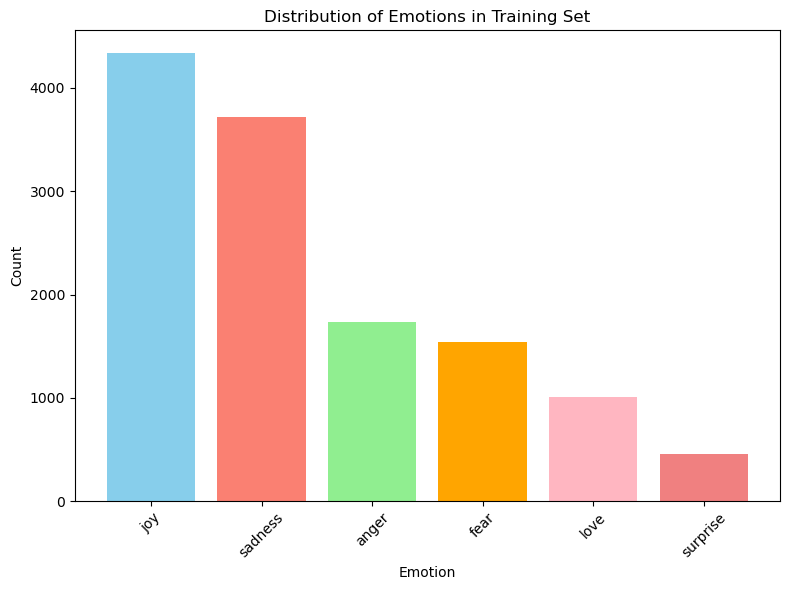

In [46]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion in the training set
emotion_counts = y_train.value_counts()

# Convert emotion labels to their corresponding names using the emotions_mapping dictionary
emotion_names = [emotions_mapping[label] for label in emotion_counts.index]

# Define colors for each emotion
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightpink', 'lightcoral']

# Plot the bar plot with different colors for each emotion
plt.figure(figsize=(8, 6))
plt.bar(emotion_names, emotion_counts, color=colors)
plt.title('Distribution of Emotions in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Model Training using Logistic Regression

In [50]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Access the coefficients of the trained model
coefficients = model.coef_


print("Coefficients:", coefficients)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Coefficients: [[ 0.03718468  0.          0.07415853 ...  0.         -0.0800131
   0.08129802]
 [-0.13025731  0.         -0.03316231 ...  0.          0.00531514
  -0.06522909]
 [-0.01203141  0.         -0.00253317 ...  0.          0.08851189
  -0.00622395]
 [ 0.06669515  0.         -0.01635605 ...  0.         -0.00821634
  -0.00720602]
 [ 0.04695225  0.         -0.0183412  ...  0.         -0.00287623
  -0.00221524]
 [-0.00854337  0.         -0.0037658  ...  0.         -0.00272136
  -0.00042372]]
Accuracy: 0.8834375


## Model Evaluation

In [51]:


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8834375


### The accuracy of 0.8834375 shows that the model effectively predicted the elegance of about 88.34% of the samples in the trying out statistics.